In [1]:
import pandas as pd
data = pd.read_csv(r"data.csv")
data.head()

,open,high,low,close,mean,rmean,rstd,rskew,rkurt,vmean,...,osum,omean,VWAP,hdis,ldis,hlchange,roc,bias,corr,price
0,1.002301,1.004680,1.002301,1.003646,1.003722,0.000034,0.000319,-0.310057,-0.650434,79.475000,...,110.0,28.900000,1.003504,20.0,39.0,0.002373,0.001341,0.999924,-0.259971,-1.0
1,0.999824,1.000828,0.999724,1.000627,1.000206,-0.000100,0.000719,-5.016628,26.609980,42.966667,...,57.0,22.614035,1.000274,2.0,26.0,0.001104,0.000803,1.000421,0.127946,-1.0
2,1.000215,1.000455,0.997391,0.997678,0.999204,-0.000118,0.000391,1.195497,1.102964,86.440000,...,68.0,31.779412,0.998894,22.0,1.0,-0.003062,-0.002536,0.998473,-0.263917,1.0
3,1.000231,1.000231,0.997972,0.997972,0.999020,0.000020,0.000801,2.415250,7.662435,130.800000,...,59.0,33.254237,0.998780,14.0,0.0,-0.002259,-0.002259,0.998951,-0.319268,1.0
4,1.000023,1.000023,0.999231,0.999749,0.999618,0.000081,0.000480,3.488813,14.896932,81.409091,...,89.0,20.123596,0.999584,21.0,19.0,-0.000792,-0.000274,1.000131,-0.137126,-1.0


## ‣Features for data


**stock.parquet**

> **time_id** : 10 mins, changes every 10 mins

> **seconds_in_bucket** : labels the exact seconds when each oerder is made in each time_id, therefore, each time_id correspond to 600 seconds (final value for **seconds_in_bucket** = 600)

> **size** : how many stocks shares are traded in this exact second in sum

> **order_count** : how many order are made in this exact second

**data.csv**

> this filed is processed data frome parquet, the index for this is time_id, and based on the group of time_id, it calculated 24 features

> **price** : +1, -1 value, for the last price going up or down **in the next time index**

## ‣ML models

### 1. SVM model

In [2]:
from MLfinalProj import MLproj # import class we have defined

X = data.drop('price', axis=1)
y = data.price
ratio = 0.75 # starting prediction from 75% number of data postion 
pred_num = 100 # how many prediciton we want to make
k = 'sigmoid'
c = 0.01

mlproj_svm = MLproj(X, y, ratio, pred_num) # create project belong to myself (van)
pre1 = mlproj_svm.predictor_SVM(Kernel=k, C = c)

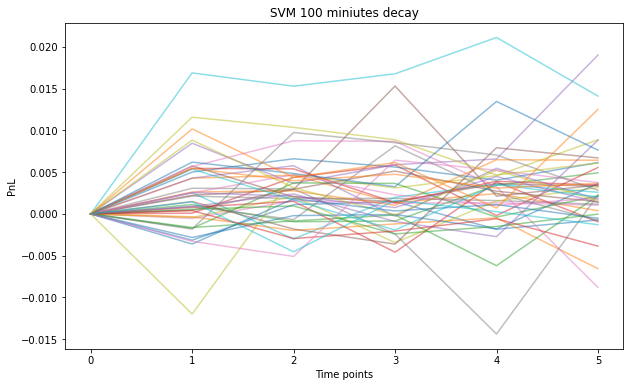

In [3]:
res = mlproj_svm.backtestor_decay(pre1, name = "SVM 100 miniutes decay", n = 5, Xlabel = "Time points", Ylabel = "PnL", long=True)

### 2. Logistic regression model

In [4]:
#predict with logistic_regression

c = 0.5 #Inverse of regularization strength, default=1.0
solver = 'liblinear'#{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

mlproj_logistic = MLproj(X, y, ratio, pred_num)
pre2 = mlproj_logistic.predictor_Logistics(c,solver)

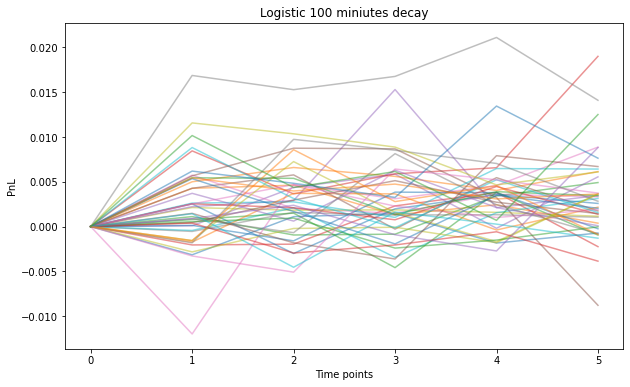

In [5]:
res = mlproj_logistic.backtestor_decay(pre2, name = "Logistic 100 miniutes decay", n = 5, Xlabel = "Time points", Ylabel = "PnL", long=True)

### 3. Gradient Boosting Decision Tree model

In [6]:
mlproj_GBDT = MLproj(X, y, ratio, pred_num)
pre3 = mlproj_GBDT.predictor_GBDT()

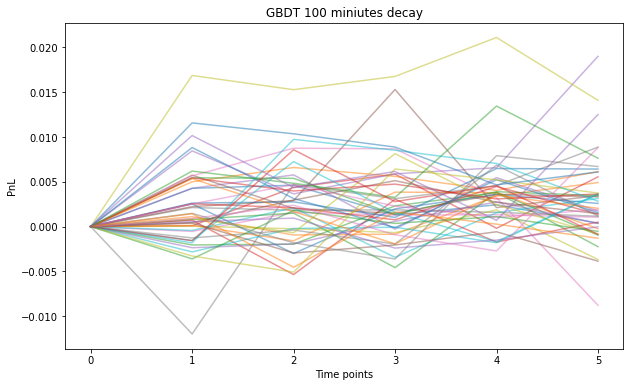

In [7]:
res = mlproj_GBDT.backtestor_decay(pre3, name = "GBDT 100 miniutes decay", n = 5, Xlabel = "Time points", Ylabel = "PnL", long=True)


### 4. Random walk model

In [8]:
mlproj_rw = MLproj(X, y, ratio, pred_num)
pre4 = mlproj_rw.predictor_Random()

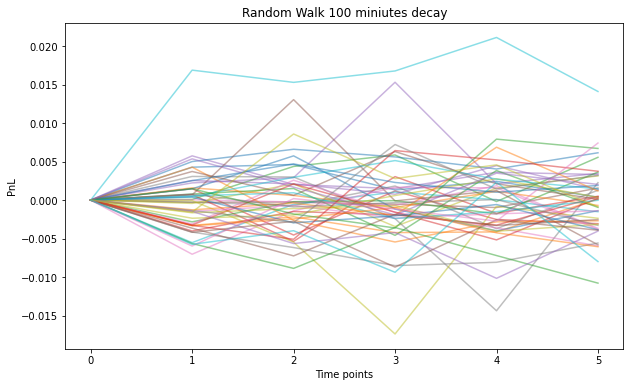

In [9]:
res = mlproj_rw.backtestor_decay(pre4, name = "Random Walk 100 miniutes decay", n = 5, Xlabel = "Time points", Ylabel = "PnL", long=True)


### 5. Naive predicton model

In [10]:
mlproj_naiv = MLproj(X, y, ratio, pred_num)
pre5 = mlproj_naiv.predictor_Naive(4)

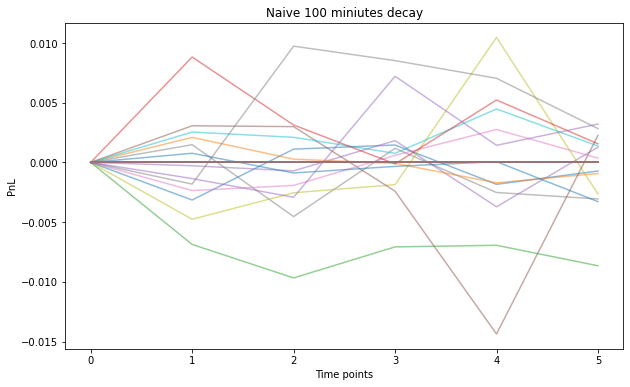

In [11]:
res = mlproj_naiv.backtestor_decay(pre5, name = "Naive 100 miniutes decay", n = 5, Xlabel = "Time points", Ylabel = "PnL", long=True)


### 6. Neural network model

In [12]:
mlproj_neural = MLproj(X, y, ratio, pred_num)
solver = 'sgd'
hidden_layer_size = (50,20)
pre6 = mlproj_neural.predictor_NeuralNetwork(solver,hidden_layer_size)

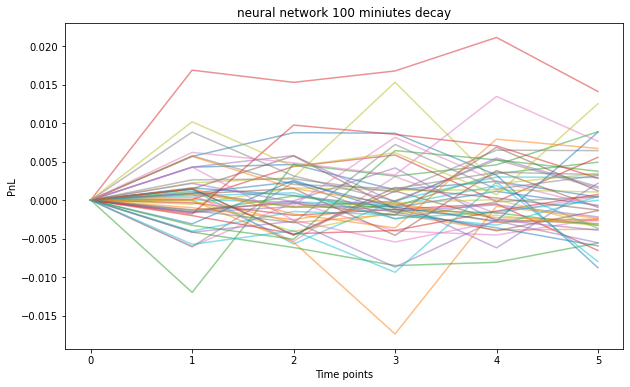

In [13]:
res = mlproj_neural.backtestor_decay(pre6, name = "neural network 100 miniutes decay", n = 5, Xlabel = "Time points", Ylabel = "PnL", long=True)

## ‣Summary

### (1) P/L curves

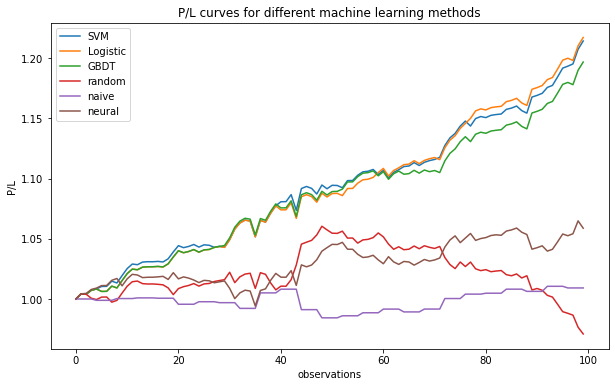

In [14]:
# P/L curves
mlproj_logistic.backtestor_Pnlcurves([pre1,pre2,pre3,pre4,pre5,pre6],['SVM','Logistic','GBDT','random','naive','neural'])

### (2) Accuracy

In [15]:
acc_svm = mlproj_svm.backtestor_accuracy()
acc_log = mlproj_logistic.backtestor_accuracy()
acc_gbdt = mlproj_GBDT.backtestor_accuracy()
acc_rw = mlproj_rw.backtestor_accuracy()
acc_np = mlproj_naiv.backtestor_accuracy()
acc_neu = mlproj_neural.backtestor_accuracy()
print('Accuracy score:')
print('SVM model: ',acc_svm)
print('Logistic regression model: ',acc_log)
print('Gradient Boosting Decision Tree model: ',acc_gbdt)
print('Random walk model: ',acc_rw)
print('Naive predicton model: ',acc_np)
print('Neural Network model: ',acc_neu)

Accuracy score:
SVM model:  0.73
Logistic regression model:  0.74
Gradient Boosting Decision Tree model:  0.74
Random walk model:  0.51
Naive predicton model:  0.14
Neural Network model:  0.61


### (3) Sharpe ratio

In [16]:
rf = 0.03
sharpeR_svm = mlproj_svm.backtestor_sharpeRatio(rf)
sharpeR_log = mlproj_logistic.backtestor_sharpeRatio(rf)
sharpeR_gbdt = mlproj_GBDT.backtestor_sharpeRatio(rf)
sharpeR_rw = mlproj_rw.backtestor_sharpeRatio(rf)
sharpeR_np = mlproj_naiv.backtestor_sharpeRatio(rf)
sharpeR_neu = mlproj_neural.backtestor_sharpeRatio(rf)
print('Sharpe ratio:')
print('SVM model: ',sharpeR_svm)
print('Logistic regression model: ',sharpeR_log)
print('Gradient Boosting Decision Tree model: ',sharpeR_gbdt)
print('Random walk model: ',sharpeR_rw)
print('naive model: ',sharpeR_np)
print('Neural Network model: ',sharpeR_neu)

Sharpe ratio:
SVM model:  45.632453410520796
Logistic regression model:  46.32342050535389
Gradient Boosting Decision Tree model:  43.28883656487872
Random walk model:  -5.539514548334883
naive model:  2.2082740386818083
Neural Network model:  13.29492411904559
